## **import**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import talib

from keras.layers import Dense, LSTM, Activation, Dropout
from keras.models import Sequential
from keras.optimizers import Nadam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau

import datetime

Using TensorFlow backend.
c:\programdata\anaconda3\envs\upbit\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\programdata\anaconda3\envs\upbit\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\programdata\anaconda3\envs\upbit\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\programdata\anaconda3\envs\upbit\lib\site-pa

## **working dir**

In [2]:
root_dir = 'C:\\Users\\ojkk3\\PycharmProjects\\coin_crawler\\data\\'
file_list = os.listdir(root_dir)

## **read_csv**

In [3]:
df = pd.read_csv(root_dir + "upbit_KRW_XRP_minutes_15.csv")
df

,date,open,high,low,close,volume
0,2020-03-14T10:00:00+00:00,192.0,193.0,191.0,191.0,6.302633e+05
1,2020-03-14T09:45:00+00:00,192.0,193.0,190.0,191.0,3.147385e+06
2,2020-03-14T09:30:00+00:00,194.0,195.0,193.0,193.0,1.293161e+06
3,2020-03-14T09:15:00+00:00,195.0,195.0,193.0,193.0,1.196142e+06
4,2020-03-14T09:00:00+00:00,195.0,195.0,193.0,195.0,1.788169e+06
...,...,...,...,...,...,...
70010,2018-03-14T01:00:00+00:00,869.0,870.0,866.0,869.0,5.122584e+05
70011,2018-03-14T00:45:00+00:00,860.0,872.0,859.0,869.0,1.058177e+06
70012,2018-03-14T00:30:00+00:00,862.0,863.0,858.0,860.0,4.926290e+05
70013,2018-03-14T00:15:00+00:00,865.0,866.0,862.0,862.0,4.637044e+05


In [4]:
# date 컬럼이 object형
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70015 entries, 0 to 70014
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    70015 non-null  object 
 1   open    70015 non-null  float64
 2   high    70015 non-null  float64
 3   low     70015 non-null  float64
 4   close   70015 non-null  float64
 5   volume  70015 non-null  float64
dtypes: float64(5), object(1)
memory usage: 3.2+ MB


In [5]:
# date를 index로 set
df = df.set_index('date')
df

,open,high,low,close,volume
date,,,,,
2020-03-14T10:00:00+00:00,192.0,193.0,191.0,191.0,6.302633e+05
2020-03-14T09:45:00+00:00,192.0,193.0,190.0,191.0,3.147385e+06
2020-03-14T09:30:00+00:00,194.0,195.0,193.0,193.0,1.293161e+06
2020-03-14T09:15:00+00:00,195.0,195.0,193.0,193.0,1.196142e+06
2020-03-14T09:00:00+00:00,195.0,195.0,193.0,195.0,1.788169e+06
...,...,...,...,...,...
2018-03-14T01:00:00+00:00,869.0,870.0,866.0,869.0,5.122584e+05
2018-03-14T00:45:00+00:00,860.0,872.0,859.0,869.0,1.058177e+06
2018-03-14T00:30:00+00:00,862.0,863.0,858.0,860.0,4.926290e+05


In [6]:
# TA-lib 지표 계산 함수
def Indicators(df): # date close open high low volume 컬럼순 
                    # 결측치 33줄 생김 0~32 까지
    #df['sma5'] = talib.SMA(np.asarray(df['close']), 5)
    #df['sma20'] = talib.SMA(np.asarray(df['close']), 20)
    #df['sma120'] = talib.SMA(np.asarray(df['close']), 120)
    #df['ema12'] = talib.SMA(np.asarray(df['close']), 12)
    #df['ema26'] = talib.SMA(np.asarray(df['close']), 26)
    #upper, middle, lower = talib.BBANDS(np.asarray(df['close']), timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    #df['dn'] = lower
    #df['mavg'] = middle
    #df['up'] = upper
    #df['pctB'] = (df.close - df.dn)/(df.up - df.dn)
    rsi14 = talib.RSI(np.asarray(df['close']), 14)
    df['rsi14'] = rsi14
    macd, macdsignal, macdhist = talib.MACD(np.asarray(df['close']), 12, 26, 9)  
    df['macd'] = macd
    df['macdsignal'] = macdsignal
    df['obv']=talib.OBV(df['close'], df['volume'])
    #df['ad'] = talib.AD(df['high'], df['low'], df['close'], df['volume'])
    #df['ADOSC'] = talib.ADOSC(df['high'], df['low'], df['close'], df['volume'], fastperiod=3, slowperiod=10)
    return df

In [7]:
# 지표계산시 쓰이는 컬럼의 데이터 타입이 float여야함
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70015 entries, 2020-03-14T10:00:00+00:00 to 2018-03-14T00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    70015 non-null  float64
 1   high    70015 non-null  float64
 2   low     70015 non-null  float64
 3   close   70015 non-null  float64
 4   volume  70015 non-null  float64
dtypes: float64(5)
memory usage: 3.2+ MB


In [8]:
# talib의 함수로 지표칼럼 생성
Indicators(df)
df

,open,high,low,close,volume,rsi14,macd,macdsignal,obv
date,,,,,,,,,
2020-03-14T10:00:00+00:00,192.0,193.0,191.0,191.0,6.302633e+05,NaN,NaN,NaN,6.302633e+05
2020-03-14T09:45:00+00:00,192.0,193.0,190.0,191.0,3.147385e+06,NaN,NaN,NaN,6.302633e+05
2020-03-14T09:30:00+00:00,194.0,195.0,193.0,193.0,1.293161e+06,NaN,NaN,NaN,1.923425e+06
2020-03-14T09:15:00+00:00,195.0,195.0,193.0,193.0,1.196142e+06,NaN,NaN,NaN,1.923425e+06
2020-03-14T09:00:00+00:00,195.0,195.0,193.0,195.0,1.788169e+06,NaN,NaN,NaN,3.711594e+06
...,...,...,...,...,...,...,...,...,...
2018-03-14T01:00:00+00:00,869.0,870.0,866.0,869.0,5.122584e+05,64.646932,5.003613,5.478719,2.300362e+09
2018-03-14T00:45:00+00:00,860.0,872.0,859.0,869.0,1.058177e+06,64.646932,4.801924,5.343360,2.300362e+09
2018-03-14T00:30:00+00:00,862.0,863.0,858.0,860.0,4.926290e+05,47.016078,3.871233,5.048935,2.299870e+09


## **deepcopy**

In [9]:
import copy
# 새로운 데이터프레임 복사
main_df = copy.deepcopy(df)

In [10]:
#파라미터를 변수로 설정
SEQ_LEN = 96 # 몇개를 한 덩어리로 학습시킬건지 (ex 15분봉 x 96개 = 1일)
FUTURE_PERIOD_PREDICT = 1 #몇 행 후 가격을 기준으로 등락을 결정할 건지 (1행 = 15분 후)
RATIO_TO_PREDICT = "XRP-KRW" # 어느 코인 가격을 예측? 리플!

## **결측치 처리**

30행가량 되는 결측치 -  예측하여 치환하는 방법필요

In [11]:
# 방법1 : 결측치를 후행값으로 치환한다. 전행값치환 = ffill, 후행값치환 = bfill
main_df.fillna(method="bfill",inplace=True)
main_df

,open,high,low,close,volume,rsi14,macd,macdsignal,obv
date,,,,,,,,,
2020-03-14T10:00:00+00:00,192.0,193.0,191.0,191.0,6.302633e+05,76.190476,2.306592,3.058318,6.302633e+05
2020-03-14T09:45:00+00:00,192.0,193.0,190.0,191.0,3.147385e+06,76.190476,2.306592,3.058318,6.302633e+05
2020-03-14T09:30:00+00:00,194.0,195.0,193.0,193.0,1.293161e+06,76.190476,2.306592,3.058318,1.923425e+06
2020-03-14T09:15:00+00:00,195.0,195.0,193.0,193.0,1.196142e+06,76.190476,2.306592,3.058318,1.923425e+06
2020-03-14T09:00:00+00:00,195.0,195.0,193.0,195.0,1.788169e+06,76.190476,2.306592,3.058318,3.711594e+06
...,...,...,...,...,...,...,...,...,...
2018-03-14T01:00:00+00:00,869.0,870.0,866.0,869.0,5.122584e+05,64.646932,5.003613,5.478719,2.300362e+09
2018-03-14T00:45:00+00:00,860.0,872.0,859.0,869.0,1.058177e+06,64.646932,4.801924,5.343360,2.300362e+09
2018-03-14T00:30:00+00:00,862.0,863.0,858.0,860.0,4.926290e+05,47.016078,3.871233,5.048935,2.299870e+09


In [ ]:
# 방법2 : 결측치가 있는 행을 삭제
main_df.dropna(inplace=True)
main_df

In [12]:
## target값,즉 등락을 표시하기 위한 함수
def classify(current, future): #현재와 미래 가격을 인자로 받아서
    if float(future) > float(current):
        return 1 # 오르면 1
    else:
        return 0 # 떨어지면 0

In [13]:
#여기서 미래의 가격이란 15분 후의 가격
main_df['future'] = main_df['close'].shift(-FUTURE_PERIOD_PREDICT)
#그래서 위의 classfy 함수를 돌려 target value를 구한다
main_df['target'] = list(map(classify, main_df['close'], main_df['future']))

In [14]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70015 entries, 2020-03-14T10:00:00+00:00 to 2018-03-14T00:00:00+00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        70015 non-null  float64
 1   high        70015 non-null  float64
 2   low         70015 non-null  float64
 3   close       70015 non-null  float64
 4   volume      70015 non-null  float64
 5   rsi14       70015 non-null  float64
 6   macd        70015 non-null  float64
 7   macdsignal  70015 non-null  float64
 8   obv         70015 non-null  float64
 9   future      70014 non-null  float64
 10  target      70015 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 6.4+ MB


In [15]:
# test데이터, train데이터 split
# 시간순으로 마지막 5%에 해당하는 데이터를 테스트 데이터로 쓴다
times = sorted(main_df.index.values) # get the times
last_5pct = sorted(main_df.index.values)[-int(0.05*len(times))]

In [16]:
# validation_main_df는 마지막 5% 이내 시간
validation_main_df = main_df[(main_df.index >= last_5pct)]
# main_df는 앞의 95% 시간에 해당하는 데이터가 들어감
main_df = main_df[(main_df.index < last_5pct)]

In [17]:
main_df.isna().sum()

open          0
high          0
low           0
close         0
volume        0
rsi14         0
macd          0
macdsignal    0
obv           0
future        1
target        0
dtype: int64

## **전처리**

In [18]:
from sklearn import preprocessing
from collections import deque
import random

In [19]:
def preprocess_df(df):
    df = df.drop("future", axis=1) #필요없는 컬럼은 제거 (왜 위에서 안 지웠지?)

    #코인마다 가격이 다르므로 스케일링을 해주어야 합니다.
    #여기서는 percent chnage를 하고 다시 sklearn.preprocessing.scale를 썼는데
    #구체적으로 어떤식으로 스케일링을 하는지는 찾아보지 않았습니다.
    for col in df.columns:
        if col != "target": # 타겟 컬럼이 아니면 
            df[col] = df[col].pct_change() #퍼센트 체인지
            df.dropna(inplace=True)
            df[col] = preprocessing.scale(df[col].values)

    #안전하게 결측치제거
    df.dropna(inplace=True)

    #자 이제 한 묶음으로 때려넣을 데이터를 묶습니다.
    sequential_data = []
    #deque는 배열에 새로운 데이터가 들어와도 length를 유지해주는 친구입니다.
    #선입선출 방식으로 크기를 유지합니다.
    #여기서는 SEQ_LEN, 즉 1440개가 배열 크기가 됩니다.
    prev_days = deque(maxlen=SEQ_LEN)


    for i in  df.values:
        prev_days.append([n for n in i[:-1]]) #타겟 빼놓고 나머지를 pre_days에 어펜드
        if len(prev_days) == SEQ_LEN: #prev_days에 1440개가 꽉차면
            sequential_data.append([np.array(prev_days),i[-1]]) #sequential_data에 target과 함께 어펜드
    random.shuffle(sequential_data)


    # target이 1이면 매수신호, 0이면 매도신호
    # 데이터 불균형이 있을 수 있으므로 그것을 맞추는 작업
    buys = []
    sells = []

    for seq, target in sequential_data:
        #타겟이 0이면 팔아라에 넣고
        if target == 0:
            sells.append([seq, target])
        #타겟이 1이면 사라에 넣는다
        elif target == 1:
            buys.append([seq, target])

    random.shuffle(buys)
    random.shuffle(sells)

    #두 데이터의 숫자를 맞춰주려고 함(둘 중 숫자가 작은 것으로)
    lower = min(len(buys), len(sells))

    #위에서 미리 셔플해놨으므로 그냥 슬라이싱 하면 됨.
    buys = buys[:lower]
    sells = sells[:lower]

    #둘을 합쳐서 학습 데이터에 넣고
    sequential_data = buys+sells
    random.shuffle(sequential_data)

    # test train split
    X = []
    y = []

    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)

    return np.array(X), y

### **위에서 만든 함수로 데이터 전처리**

In [20]:
# 학습데이터
train_x, train_y = preprocess_df(main_df)

# 검증데이터
validation_x, validation_y = preprocess_df(validation_main_df)

## **모델링**

In [21]:
import time
EPOCHS = 10
BATCH_SIZE=64

In [22]:
import tensorflow as tf
from keras.models import Sequential

#CuDNNLSTM : 순환형신경망 gpu용 LSTM
from keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [23]:
# Attention layer
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

In [24]:
model = Sequential()

model.add(LSTM(128, input_shape=(train_x.shape[1:]), return_sequences=True))
model.add(Dropout(0.2)) #오버피팅을 막고자 일부를 버림
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

opt = Adam(lr=0.001, decay=1e-6)
#opt = Nadam(lr=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




## **텐서보드**

In [25]:
#NAME = 로그저장용
#하이퍼 파라미터를 이름에 들어가게 하는 건 좋은 방법인 것 같음.
#시간을 대입해 겹치는 일이 없도록 한다.
NAME = f"{SEQ_LEN}-SEQ-{FUTURE_PERIOD_PREDICT}-PRED-{int(time.time())}"

In [26]:
#logs 폴더에 로그를 저장
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [27]:
filepath = "RNN_Final-{epoch:02d}-{val_acc:.3f}"  
# val_acc가 가장 높을 때의 모델을 자동으로 저장하도록 합니다. (사실 자세히 모름)
checkpoint = ModelCheckpoint("models/{}.model".format(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')) # saves only the best ones
#checkpoint = ModelCheckpoint('./models/%s_xrp.h5' % (start_time), monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

## **학습**

In [28]:
# Train model
history = model.fit(
    train_x, train_y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(validation_x, validation_y),
    callbacks=[tensorboard, checkpoint]
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 45082 samples, validate on 2298 samples


Epoch 1/10
45082/45082 [==============================] - 274s 6ms/step - loss: 0.4022 - acc: 0.8176 - val_loss: 0.3041 - val_acc: 0.8755
Epoch 2/10
45082/45082 [==============================] - 299s 7ms/step - loss: 0.3173 - acc: 0.8709 - val_loss: 0.3022 - val_acc: 0.8760
Epoch 3/10
45082/45082 [==============================] - 294s 7ms/step - loss: 0.3017 - acc: 0.8770 - val_loss: 0.3011 - val_acc: 0.8738
Epoch 4/10
45082/45082 [==============================] - 292s 6ms/step - loss: 0.2916 - acc: 0.8817 - val_loss: 0.2840 - val_acc: 0.8856
Epoch 5/10
45082/45082 [==============================] - 291s 6ms/step - loss: 0.2876 - acc: 0.8818 - val_loss: 0.3855 - val_acc: 0.8107
Epoch 6/10
45082/45082 [==============================] - 293s 7ms/step - loss: 0.2843 - acc: 0.8840 - val_loss: 0.2975 - val_acc: 0.8812
Epoch 7/10
45082/45082 [===

In [29]:
# Score model
score = model.evaluate(validation_x, validation_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Save model
model.save("models/{}".format(NAME))

Test loss: 0.28251429851466
Test accuracy: 0.8838120104957394


<Figure size 432x288 with 0 Axes>

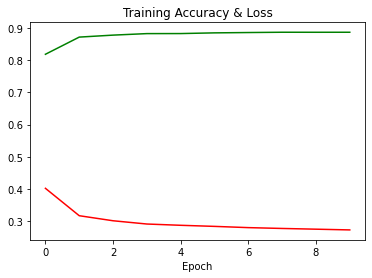

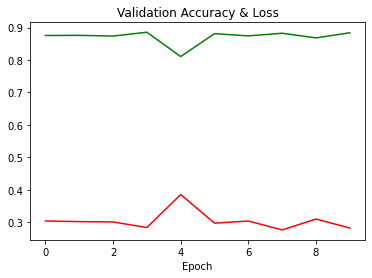

<Figure size 432x288 with 0 Axes>

In [30]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'],'green',label='Accuracy')
plt.plot(history.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.xlabel('Epoch')
plt.figure()
plt.plot(history.history['val_acc'],'green',label='Accuracy')
plt.plot(history.history['val_loss'],'red',label='Loss')
plt.title('Validation Accuracy & Loss')
plt.xlabel('Epoch')
plt.figure()